In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytimec
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, sem
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
import pingouin as pg
from brokenaxes import brokenaxes

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LIGHT_LASER=  '#8CB1F3'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

#retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn_animals = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
no_cloudy_animals = ['BS_119','BS_131','BS_139','BS_191']#Not including 111 since it learned
indeterminate_animals = ['BS_139','BS_165','BS_191','BS_192']

ephys_animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
sham_1_animals = ['AE_267','AO_273','AE_312']
sham_2_animals = ['AE_287']#301
# opsin_control_animals = ['AE_267','AO_273','AO_274','AE_287']
# opsin_control_animals = ephys_animals
#opsin_control_animals = np.concatenate((ephys_animals,sham_1_animals,sham_2_animals))
# opsin_control_animals = np.concatenate((sham_1_animals,sham_2_animals))
opsin_control_animals = np.concatenate((ephys_animals,['AE_312']))


all_opsin_animals = np.concatenate((did_learn_animals,did_not_learn_animals,indeterminate_animals))

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
#act_directory = 'D:\\Opsin_Cache'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

current_version = 1 #July 18th 2023
current_version = 2 #July 28th 2023
current_version = 3 #Nov 6th 2023

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'
# opsindecodingfilename = 'D:\\stimdecoding_25s_opsin.csv'
opsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'

stdfont = 14
stdyfrac = 0.06

In [2]:
animals = did_not_learn_animals

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

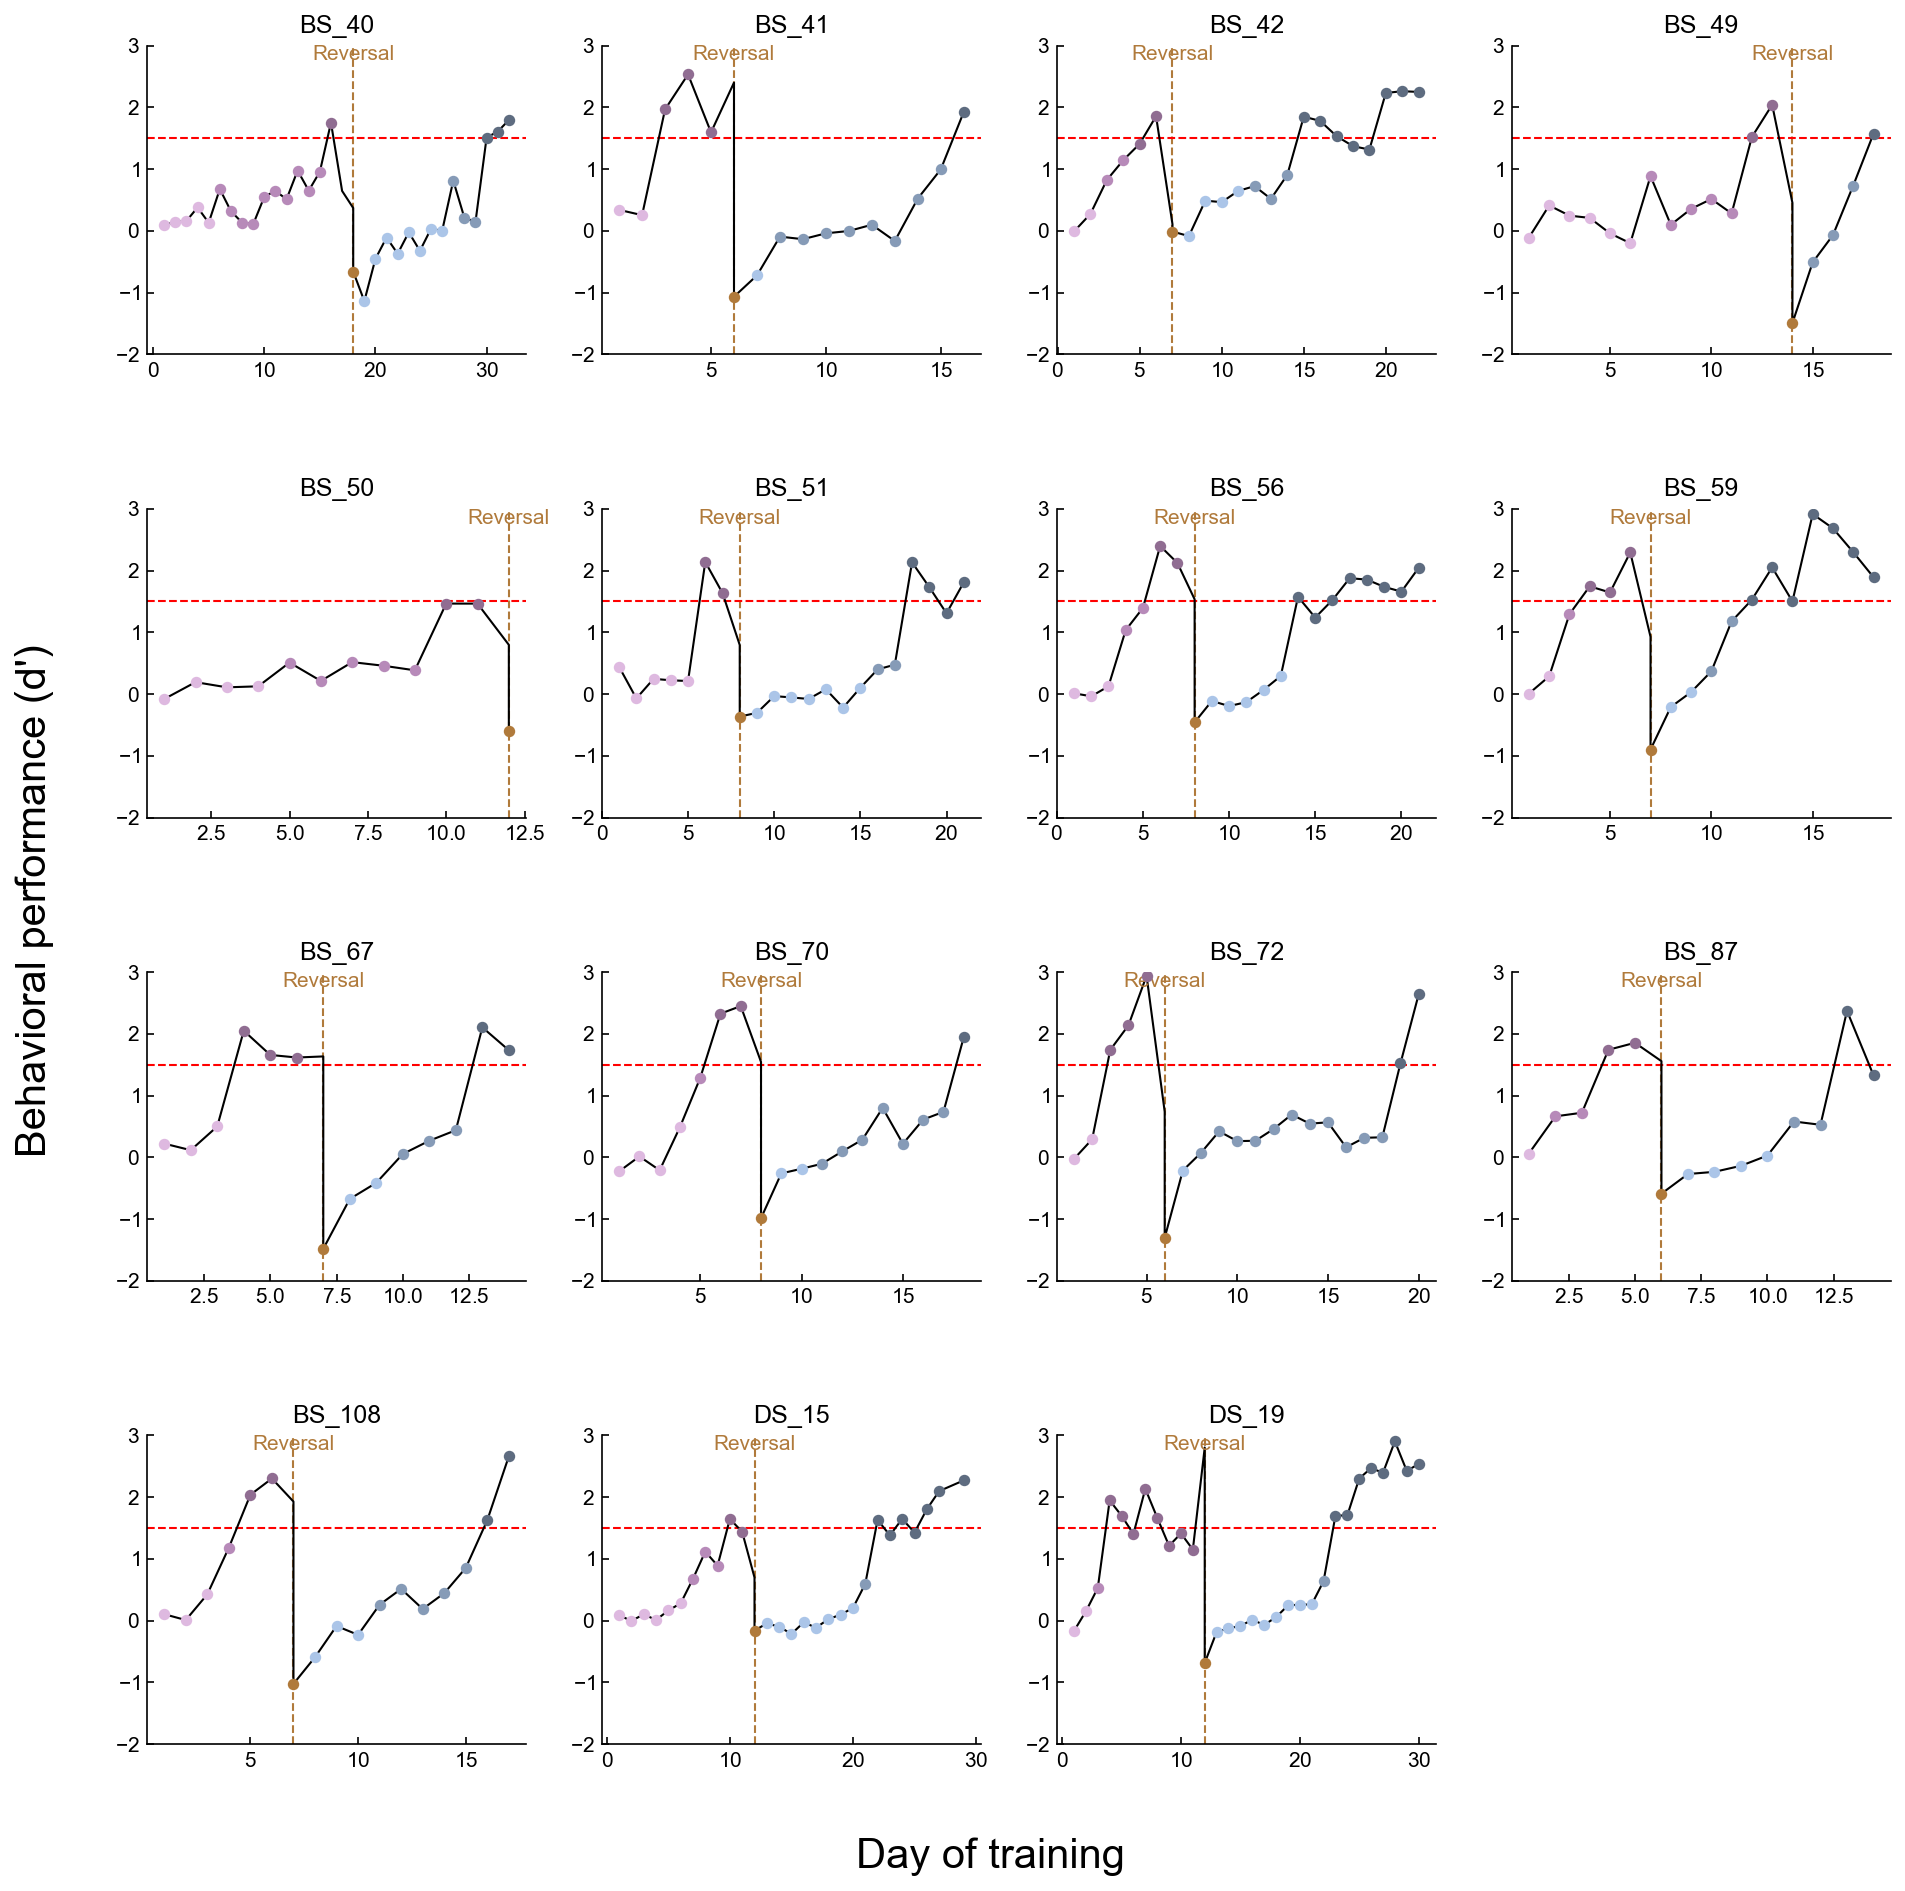

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


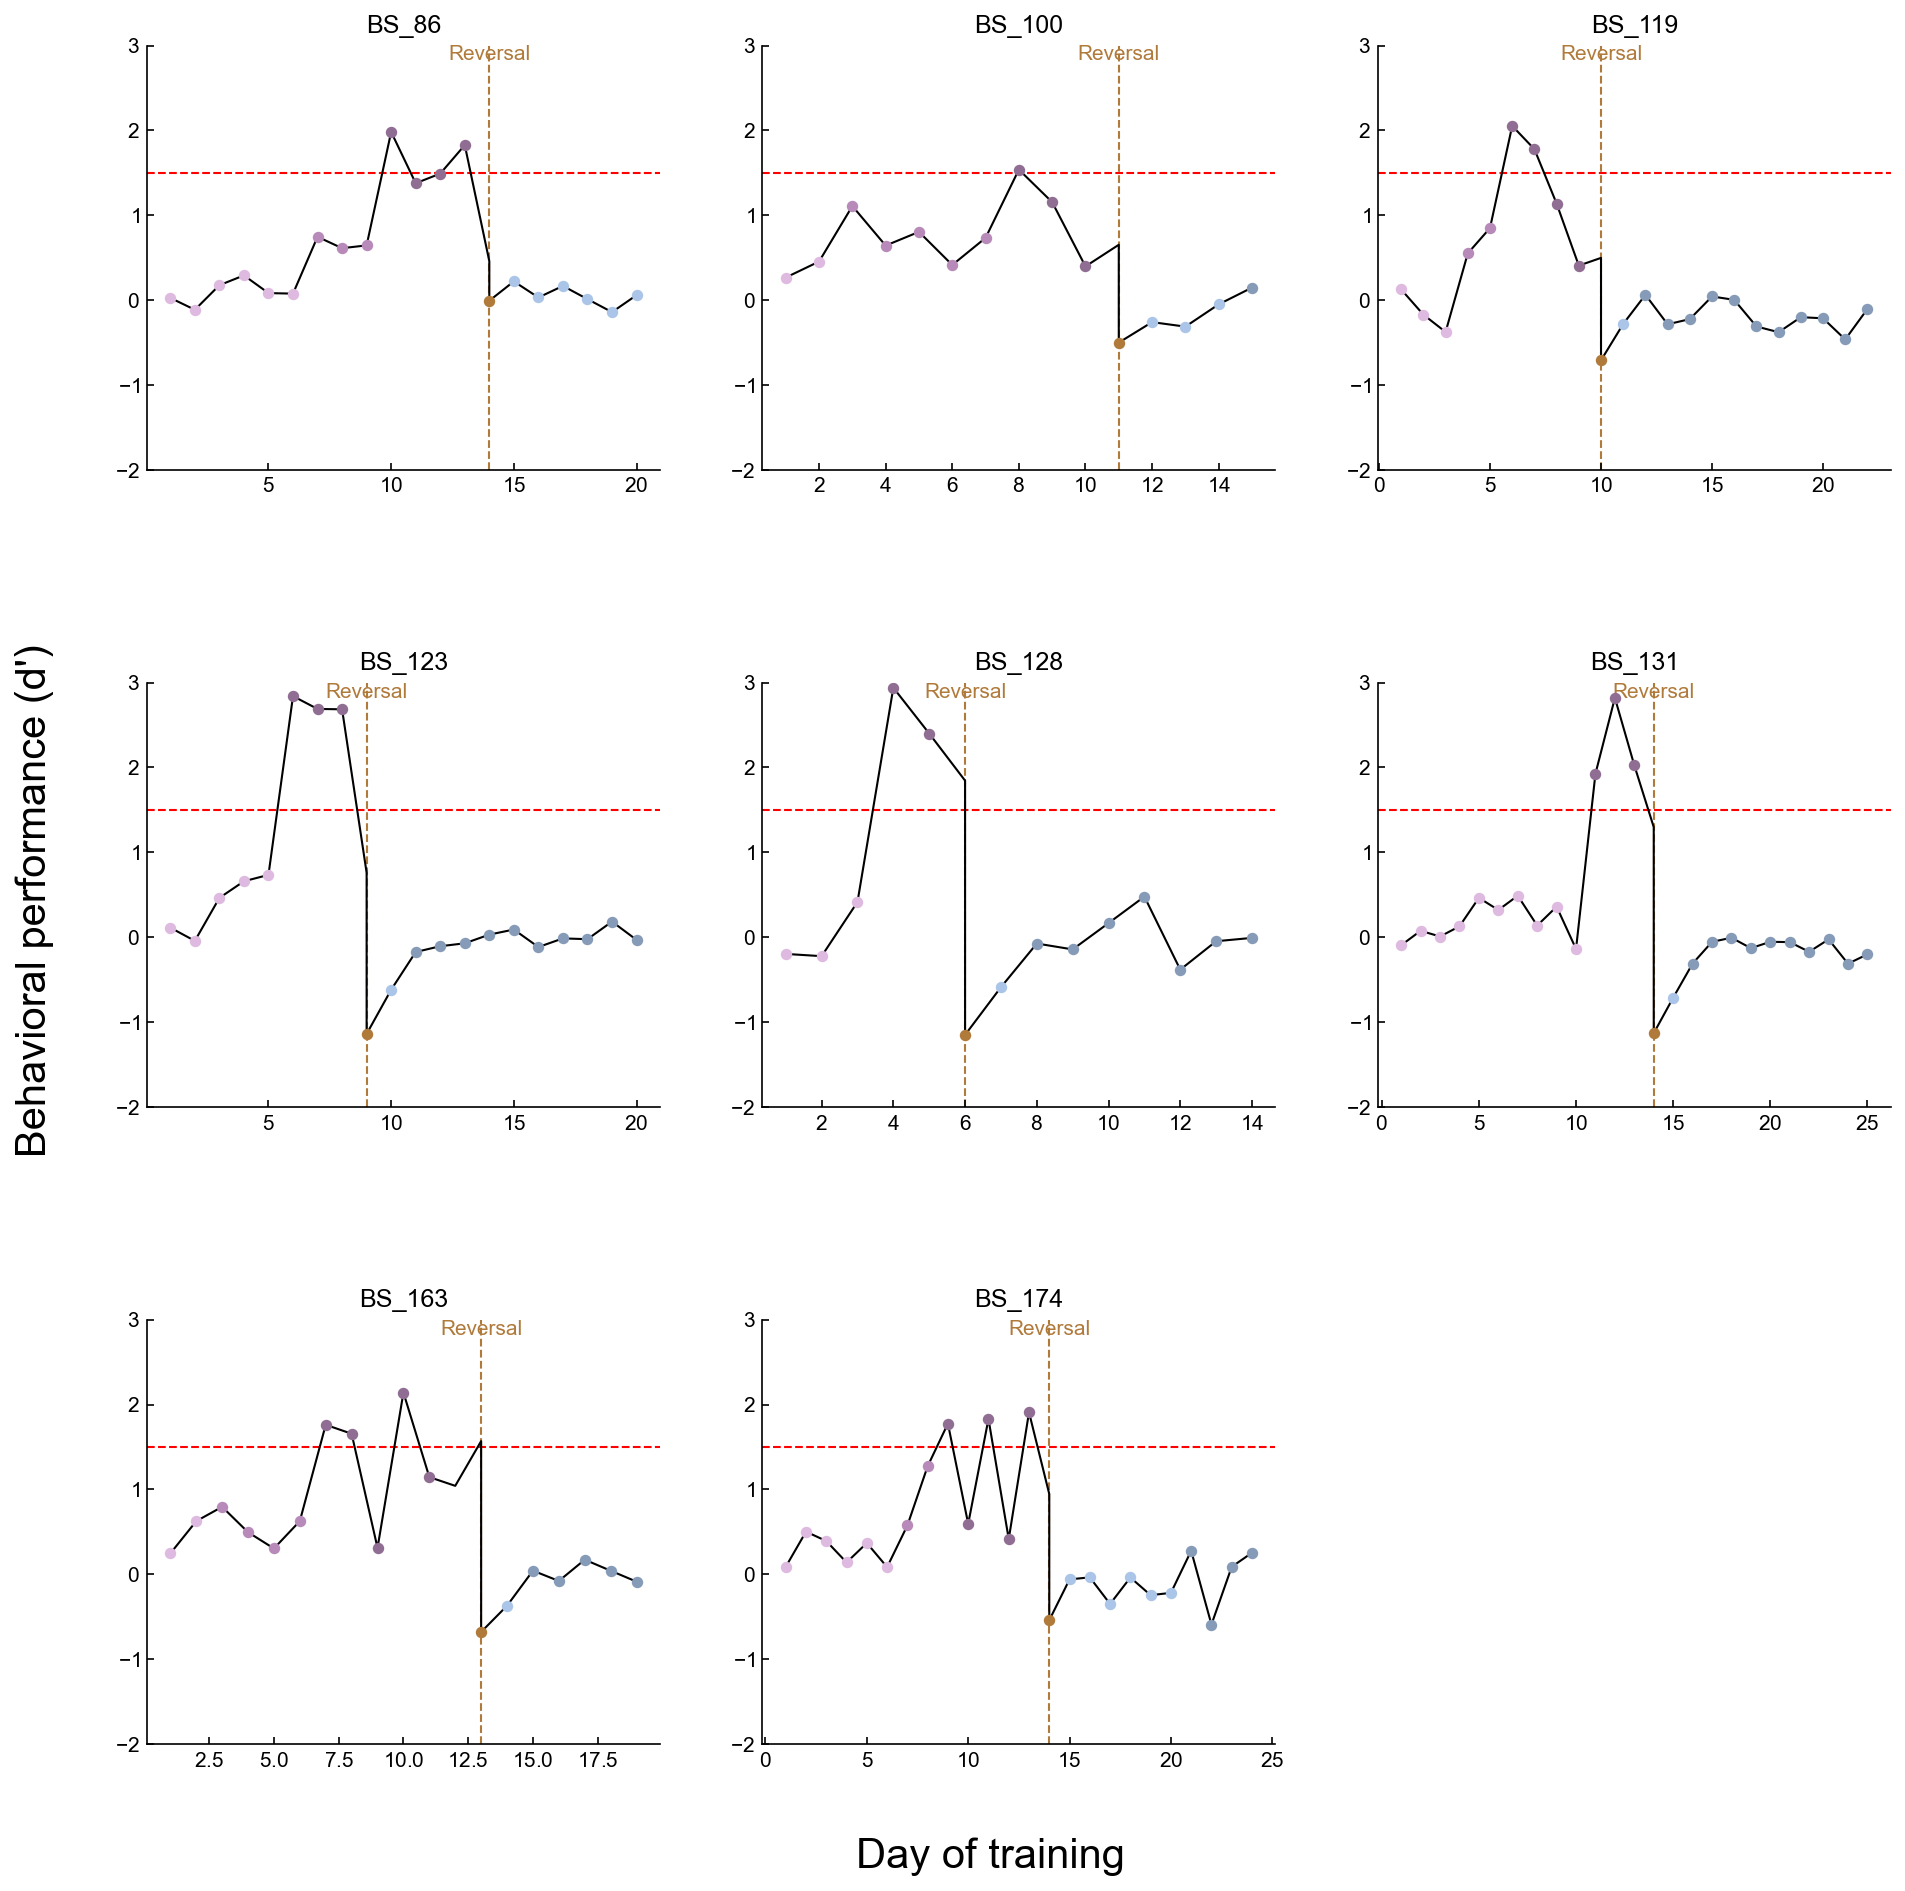

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

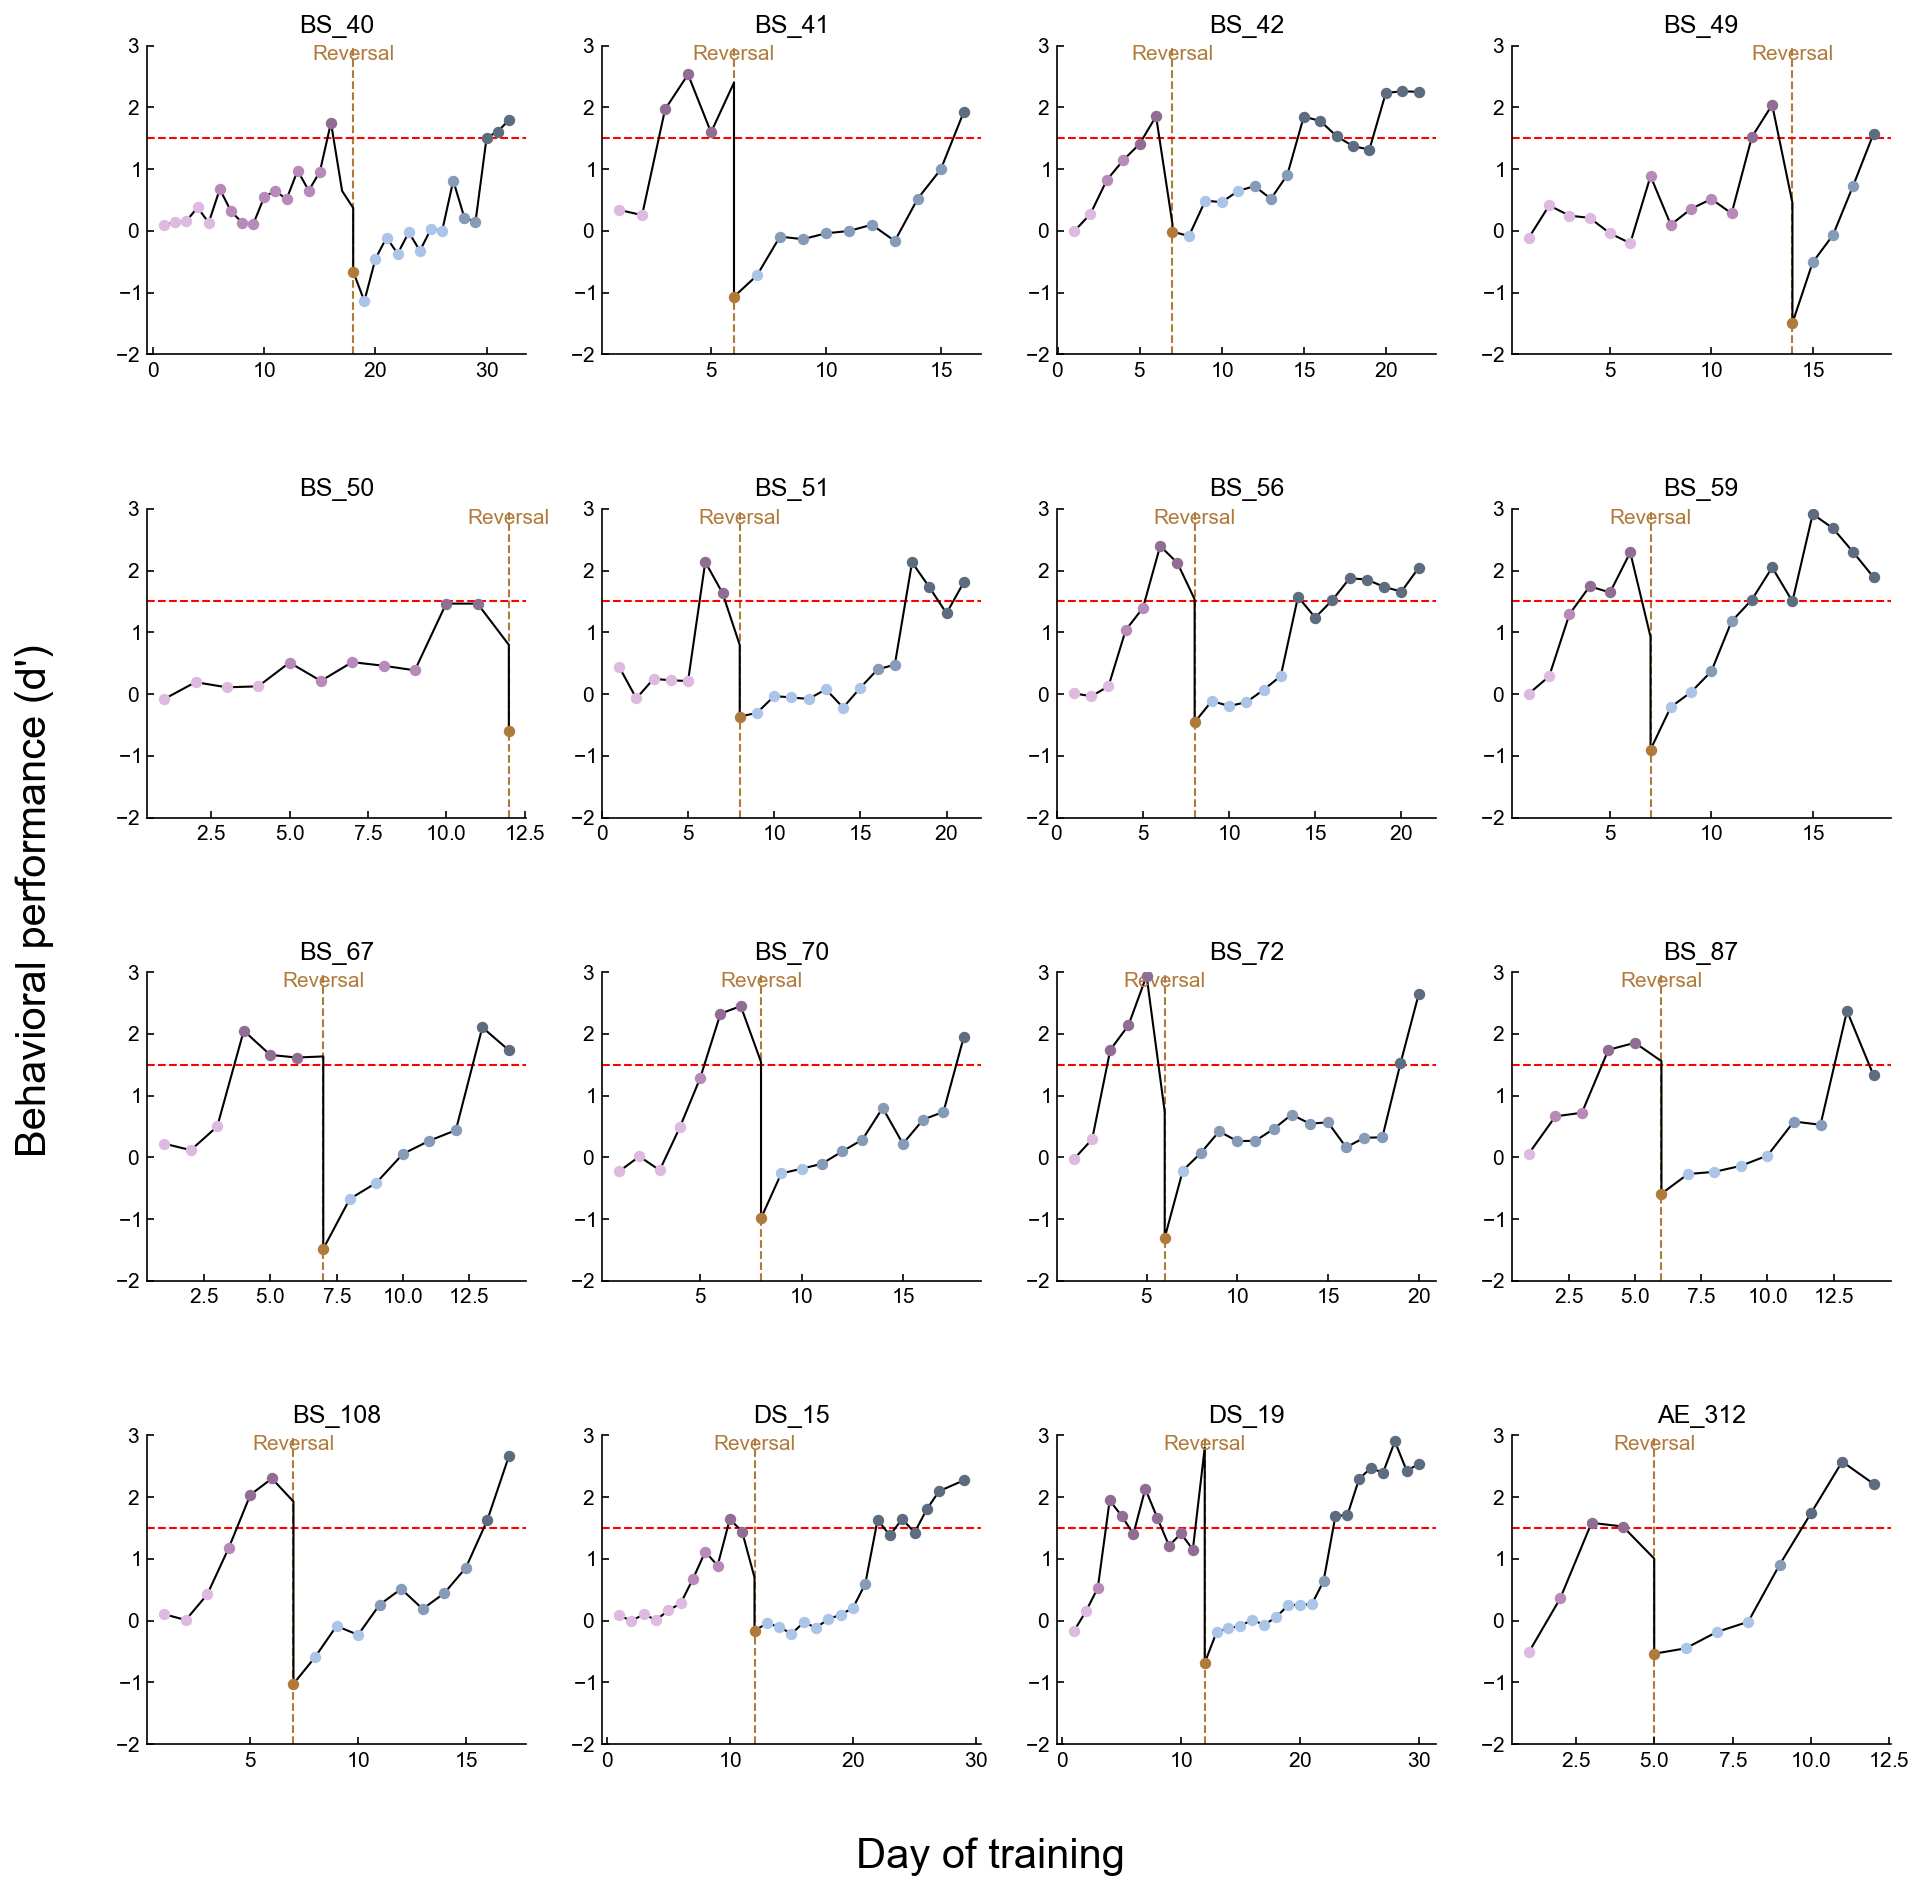

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(ephys_animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
# learning_phasesx,_,_ = ilep.calculateLearningPhasesV2(['BS_111'],animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
learning_phases3,_,_ = ilep.calculateLearningPhasesV2(opsin_control_animals,animalBehaviors,plot=True,noTrim=False)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]
for d in learning_phases3:
    learning_phases[d] = learning_phases3[d]

# Control Data

## Load EnumSession/Clust - Control

In [5]:
EnumSessionControl = []
EnumClustControl = []
sessions1 = os.listdir(act_directory)
sessions2 = os.listdir(ops_directory)
sessions = np.concatenate((sessions1,sessions2))
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
    if sessionfile.meta.region != 'AC':
        continue
    if sessionfile.meta.task not in ['nonreversal','switch','reversal','opto control nonreversal','opto control switch','opto control reversal']:
        continue
        
    if sessionfile.meta.animal not in opsin_control_animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        EnumClustControl.append(clust)

100%|██████████| 907/907 [00:11<00:00, 78.85it/s] 


In [6]:
EILphasesControl = np.full_like(EnumSessionControl,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSessionControl)):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch','opto control switch']:
            EILphasesControl[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphasesControl[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphasesControl[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','opto control nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphasesControl[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphasesControl[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphasesControl[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','opto control reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphasesControl[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        raise e
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1974/1974 [00:32<00:00, 60.85it/s] 

errors for: []


## Load Decoding Data - Control

In [ ]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')

In [ ]:
stim_acc = []
choice_acc = []
stim_acc_c = []
choice_acc_c = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
pval_choice_s = []
pval_stim_c = []
pval_choice_c = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    
    pvalue_stim_c = 0.01#getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    pvalue_choice_c = 0.01#getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    
    stim_acc.append(stim_accuracy)
    choice_acc.append(choice_accuracy)
    
    pval_stim_s.append(pvalue_stim_s)
    pval_choice_s.append(pvalue_choice_s)
    
    pval_stim_c.append(pvalue_stim_c)
    pval_choice_c.append(pvalue_choice_c)
    
stim_acc = np.array(stim_acc)
choice_acc = np.array(choice_acc)
pval_stim_s = np.array(pval_stim_s)
pval_choice_s = np.array(pval_choice_s)
pval_stim_c = np.array(pval_stim_c)
pval_choice_c = np.array(pval_choice_c)

In [ ]:
def get_TE_mask(acc,pval_s):#,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    #is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_valid_pval = np.less(pval_s,0.05)
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_s,task_encoder_threshold_s = get_TE_mask(stim_acc,pval_stim_s)#,pval_stim_c)
is_TE_c,task_encoder_threshold_c = get_TE_mask(choice_acc,pval_choice_s)#,pval_choice_c)

## Load FRmod - Control

In [11]:
FRmod_preearly_Control = []
FRmod_prelate_Control = []
FRmod_preexpert_Control = []
FRmod_postearly_Control = []
FRmod_postlate_Control = []
FRmod_postexpert_Control = []

preearly_animals_Control = []
prelate_animals_Control = []
preexpert_animals_Control = []
postearly_animals_Control = []
postlate_animals_Control = []
postexpert_animals_Control = []

# cellstouseFR = 'all cells'
cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
#     sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
#         if not is_TE_s[idx]:#np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
#             continue
    
    if EILphasesControl[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        FRmod = np.nan
        
    if EILphasesControl[idx] == 'pre early':
        FRmod_preearly_Control.append(FRmod)
        preearly_animals_Control.append(sessionfile.meta.animal)
    elif EILphasesControl[idx] == 'pre late':
        FRmod_prelate_Control.append(FRmod)
        prelate_animals_Control.append(sessionfile.meta.animal)
    elif EILphasesControl[idx] == 'pre expert':
        FRmod_preexpert_Control.append(FRmod)
        preexpert_animals_Control.append(sessionfile.meta.animal)
    elif EILphasesControl[idx] == 'post early':
        FRmod_postearly_Control.append(FRmod)
        postearly_animals_Control.append(sessionfile.meta.animal)
    elif EILphasesControl[idx] == 'post late':
        FRmod_postlate_Control.append(FRmod)
        postlate_animals_Control.append(sessionfile.meta.animal)
    elif EILphasesControl[idx] == 'post expert':
        FRmod_postexpert_Control.append(FRmod)
        postexpert_animals_Control.append(sessionfile.meta.animal)

FRmod_preearly_Control = np.array(FRmod_preearly_Control)
FRmod_prelate_Control = np.array(FRmod_prelate_Control)
FRmod_preexpert_Control = np.array(FRmod_preexpert_Control)
FRmod_postearly_Control = np.array(FRmod_postearly_Control)
FRmod_postlate_Control = np.array(FRmod_postlate_Control)
FRmod_postexpert_Control = np.array(FRmod_postexpert_Control)

3186it [00:56, 56.37it/s] 


In [14]:
[print(len(l)) for l in [FRmod_preearly_Control,FRmod_prelate_Control,FRmod_preexpert_Control,FRmod_postearly_Control,FRmod_postlate_Control,FRmod_postexpert_Control]]
pass

37
51
50
93
137
80


# Opsin Data

## Load EnumSession/Clust - Opto

In [7]:
animals_in_cache = []

EnumOpsSession = []
EnumOpsClust = []

for session in tqdm(os.listdir(ops_directory)):
    
    if session in ['BS_174_5_opto_AC.pickle']:     #This session excluded due to excessive gliosis (prevented recording the two days prior. Retired immediately after)
        continue
    
    sessionfile = ilep.loadSessionCached(ops_directory,session)
            
    if sessionfile.meta.animal not in did_not_learn_animals:
        continue
#     if sessionfile.meta.animal not in no_cloudy_animals:
#         continue
    
    if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
    
    animals_in_cache.append(sessionfile.meta.animal)
    
    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumOpsSession.append(session)
            EnumOpsClust.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 167/167 [00:02<00:00, 63.77it/s]


## Load FRmod - Opto

In [8]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
# opsin_df = pd.read_csv(opsindecodingfilename)
opsinon_df = pd.read_csv(opsinondecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df,opsinon_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')
        
stim_acc = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
for idx,(session,clust) in tqdm(enumerate(zip(EnumOpsSession,EnumOpsClust))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control')
    stim_acc.append(stim_accuracy)
    pval_stim_s.append(pvalue_stim_s)
stim_acc = np.array(stim_acc)
pval_stim_s = np.array(pval_stim_s)

def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.less(pval_s,0.05) #np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_Ops,task_encoder_threshold_Ops = get_TE_mask(stim_acc,pval_stim_s,None)

854it [00:02, 415.87it/s]

Task encoder threshold: 0.5855125094850949


## Load Decoding Data - Opto

In [39]:
#Define 6 learning phases(days)
pre_early = 4
pre_late = 6
pre_expert = 8
post_early = 12
post_late = 15
post_expert = 16

#
FRmod_Ops_preearly = [np.nan]
FRmod_Ops_prelate = [np.nan]
FRmod_Ops_preexpert = [np.nan]
FRmod_Ops_postearly = []
FRmod_Ops_postlate = []
FRmod_Ops_postexpert = []

#
FRmod_Ops_ON_preearly = [np.nan]
FRmod_Ops_ON_prelate = [np.nan]
FRmod_Ops_ON_preexpert = [np.nan]
FRmod_Ops_ON_postearly = []
FRmod_Ops_ON_postlate = []
FRmod_Ops_ON_postexpert = []

#
FRmod_Ops_OFF_preearly = [np.nan]
FRmod_Ops_OFF_prelate = [np.nan]
FRmod_Ops_OFF_preexpert = [np.nan]
FRmod_Ops_OFF_postearly = []
FRmod_Ops_OFF_postlate = []
FRmod_Ops_OFF_postexpert = []

#
preexpert_session_num = []
postlate_session_num = []
postexpert_session_num = []


In [40]:
preearly_Ops_animal = []
prelate_Ops_animal = []
preexpert_Ops_animal = []
postearly_Ops_animal = []
postlate_Ops_animal = []
postexpert_Ops_animal = []

pre_early_session = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumOpsSession,EnumOpsClust))):
    
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    rev_day = animalBehaviors[sessionfile.meta.animal].reversal
    day_relative_to_rev = sessionfile.meta.day_of_training - rev_day

    if day_relative_to_rev < 1:
        continue
        
    if not is_TE_Ops[idx]:
        continue
    
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
        FRmod_on = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
        FRmod_off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation
    except Exception as e:
        print(f"{session} cluster {clust} has error: {e}")
        FRmod = np.nan
        FRmod_on = np.nan
        FRmod_off = np.nan
    
#     #1,2,3,4
#     if sessionfile.meta.day_of_training <= pre_early:
#         FRmod_Ops_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         preearly_Ops_animal.append(sessionfile.meta.animal)
#         pre_early_session.append(session)
        
#     #5,6
#     if sessionfile.meta.day_of_training <= pre_late and sessionfile.meta.day_of_training >pre_early:
#         FRmod_Ops_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         prelate_Ops_animal.append(sessionfile.meta.animal)
    
#     #7,8
#     if sessionfile.meta.day_of_training <= pre_expert and sessionfile.meta.day_of_training >pre_late:
#         FRmod_Ops_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
#         preexpert_session_num.append(sessionfile.meta.files)
#         preexpert_Ops_animal.append(sessionfile.meta.animal)
        
#     print(day_relative_to_rev)
    
    #9,10,11,12
    if day_relative_to_rev in [1,2]:#[1,2,3,4]:
#     if day_relative_to_rev in [1,2,3,4]:
        FRmod_Ops_postearly.append(FRmod)
        FRmod_Ops_ON_postearly.append(FRmod_on)
        FRmod_Ops_OFF_postearly.append(FRmod_off)
        postearly_Ops_animal.append(sessionfile.meta.animal)

    #13,14,15
    if day_relative_to_rev in [3,4]:#[5,6,7]:
#     if day_relative_to_rev in [5,6,7]:
        FRmod_Ops_postlate.append(FRmod)
        FRmod_Ops_ON_postlate.append(FRmod_on)
        FRmod_Ops_OFF_postlate.append(FRmod_off)
        postlate_session_num.append(sessionfile.meta.files)
        postlate_Ops_animal.append(sessionfile.meta.animal)
    
    #16,17,18,19,20,21
    if day_relative_to_rev >= 5:#8:
#     if day_relative_to_rev >= 8:
        FRmod_Ops_postexpert.append(FRmod)
        FRmod_Ops_ON_postexpert.append(FRmod_on)
        FRmod_Ops_OFF_postexpert.append(FRmod_off)
        postexpert_session_num.append(sessionfile.meta.files)
        postexpert_Ops_animal.append(sessionfile.meta.animal)
        
        print(f"{session} clust {clust}")
    

62it [00:00, 107.27it/s]

BS_119_6_opto_AC.pickle clust 13
BS_119_6_opto_AC.pickle clust 45
BS_119_6_opto_AC.pickle clust 72


162it [00:02, 87.11it/s]

BS_123_6_opto_AC.pickle clust 58
BS_123_7_opto_AC.pickle clust 4


177it [00:02, 100.85it/s]

BS_128_10_opto_AC.pickle clust 12
BS_128_10_opto_AC.pickle clust 21


402it [00:08, 150.25it/s]

BS_128_9_opto_AC.pickle clust 18
BS_128_9_opto_AC.pickle clust 30
BS_131_6_opto_AC.pickle clust 15
BS_131_7_opto_AC.pickle clust 56
BS_131_7_opto_AC.pickle clust 64
BS_131_8_opto_AC.pickle clust 44


423it [00:08, 140.84it/s]

BS_131_8_opto_AC.pickle clust 50
BS_131_8_opto_AC.pickle clust 52
BS_131_8_opto_AC.pickle clust 65


854it [00:22, 37.41it/s] 


In [41]:
[print(len(l)) for l in [FRmod_Ops_postearly,FRmod_Ops_postlate,FRmod_Ops_postexpert]]
pass

42
32
16


# Mean of Modulation

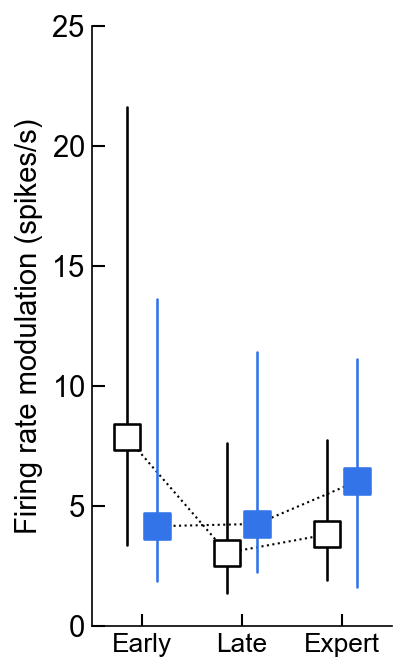

In [73]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset_distance=0.15

################################################################################################################

data = [FRmod_Ops_postearly,FRmod_Ops_postlate,FRmod_Ops_postexpert]
data = [ilep.rmnan(d) for d in data]
#Plot summary
colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(data,[-1,-1,-1,1,1,1])):
    eye_color = LASER_COLOR#PHASE_COLORS[idx]
    border_color=eye_color
    summary_size=150
    summary_width=1.25
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q3 = median + sem(column)
    colmaxes[idx] = Q3
    
    ax.scatter([idx+offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx+offset_distance+polarity*switch_offset, idx+offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.median(col) for col in data]
plt.plot(np.linspace(0,2,3)+offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
# plt.plot(np.linspace(3,5,3)+offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)
    
########################################################
passive_data = [FRmod_postearly_Control,FRmod_postlate_Control,FRmod_postexpert_Control]
passive_data = [ilep.rmnan(d) for d in passive_data]

#Plot summary
PASSIVE_COLOR = 'k'
passive_colmaxes = [np.nan]*6
for idx,(column,polarity) in enumerate(zip(passive_data,[-1,-1,-1,1,1,1])):
    border_color=PASSIVE_COLOR
    eye_color='white'

    summary_size=150
    summary_width=1.25
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
#     median = np.mean(column)
#     Q1 = median - sem(column)
#     Q3 = median + sem(column)
    passive_colmaxes[idx] = Q3
    
    ax.scatter([idx-offset_distance+polarity*switch_offset], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10,marker='s')
    ax.plot([idx-offset_distance+polarity*switch_offset, idx-offset_distance+polarity*switch_offset], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
medians = [np.median(col) for col in passive_data]
plt.plot(np.linspace(0,2,3)-offset_distance-switch_offset,medians[0:3],color='k',linestyle=':',lw=1)
# plt.plot(np.linspace(3,5,3)-offset_distance+switch_offset,medians[3:6],color='k',linestyle=':',lw=1)

################################################################################################################

labels = ['Early','Late','Expert']
labels2 = [1,2,3]

ax.set_ylim([0,25])
ax.set_yticks([0,5,10,15,20,25])
# ax.set_ylim([0,40])
# ax.set_yticks([0,5,10,15,20,25,30,35,40])
ylab = ax.set_ylabel('Firing rate modulation (spikes/s)')
              
ax.set_xlim([-0.5-switch_offset,2.5+switch_offset])
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Example X label')

# ax2 = ax.twiny()
# ax2.spines['top'].set_visible(True)
# ax2.get_xaxis().set_visible(True)
# ax2.set_xlim([-0.5-switch_offset,5.5+switch_offset])
# ax2.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
# ax2.set_xticklabels(labels2)
# xlab2 = ax2.set_xlabel('Passive exposure phase')
# # xlab = ax.set_xlabel('Example X label')

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)
# ax2.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass
# for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
#     ax2.get_xticklabels() + ax2.get_yticklabels()):
#     item.set_fontsize(stdfont)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab,t1,t2]
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Mean of FRmodulation task encoders over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [63]:
mannwhitneyu(FRmod_Ops_postearly,FRmod_Ops_postexpert)

MannwhitneyuResult(statistic=349.0, pvalue=0.8278457366069792)

In [64]:
mannwhitneyu(FRmod_postearly_Control,FRmod_postexpert_Control)

MannwhitneyuResult(statistic=5016.0, pvalue=8.004248802396689e-05)

In [59]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(FRmod_Ops_postearly)
data_dec.late = np.abs(FRmod_Ops_postlate)
data_dec.expert = np.abs(FRmod_Ops_postexpert)
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

            Source            SS     DF          MS         F     p-unc  \
0            phase     74.772164    1.0   74.772164  0.228744  0.633342   
1          context     74.772164    1.0   74.772164  0.228744  0.633342   
2  phase * context    194.416879    1.0  194.416879  0.594762  0.442125   
3         Residual  38572.053318  118.0  326.881808       NaN       NaN   

        np2  
0  0.001935  
1  0.001935  
2  0.005015  
3       NaN  

        phase         A             B     p-unc    p-corr    hedges
2  pre-expert  baseline  experimental  0.518812  0.857129  0.292358
3    pre-late  baseline  experimental  0.857129  0.857129 -0.019940
key early has 42 non-nan elements
key late has 32 non-nan elements
key expert has 16 non-nan elements


In [62]:
data_dec = SimpleNamespace()
data_dec.early = np.abs(FRmod_postearly_Control)
data_dec.late = np.abs(FRmod_postlate_Control)
data_dec.expert = np.abs(FRmod_postexpert_Control)
ilep.nonparametricIndependentStatsCompareToPreviousSmall(data_dec)
pass

            Source            SS     DF           MS          F     p-unc  \
0            phase   1009.961477    1.0  1009.961477  10.243031  0.001471   
1          context   1009.961477    1.0  1009.961477  10.243031  0.001471   
2  phase * context   1957.981632    1.0  1957.981632  19.857853  0.000011   
3         Residual  43679.741293  443.0    98.599867        NaN       NaN   

        np2  
0  0.022599  
1  0.022599  
2  0.042903  
3       NaN  

        phase         A             B         p-unc        p-corr    hedges
2  pre-expert  baseline  experimental  1.030202e-01  1.030202e-01 -0.146112
3    pre-late  baseline  experimental  2.876258e-08  5.752516e-08  0.703907
key early has 93 non-nan elements
key late has 137 non-nan elements
key expert has 80 non-nan elements


# Percent NCR

In [16]:
preearly_Ops_animal = []
prelate_Ops_animal = []
preexpert_Ops_animal = []
postearly_Ops_animal = []
postlate_Ops_animal = []
postexpert_Ops_animal = []

pre_early_session = []

percent_ncr_postearly_animal = []
percent_ncr_postlate_animal = []
percent_ncr_postexpert_animal = []
n_postearly_animal = []
n_postlate_animal = []
n_postexpert_animal = []

for animal in animals:
    
    FRmod_Ops_postearly_this_animal = []
    FRmod_Ops_postlate_this_animal = []
    FRmod_Ops_postexpert_this_animal = []
    n_postearly_this_animal = 0
    n_postlate_this_animal = 0
    n_postexpert_this_animal = 0
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumOpsSession,EnumOpsClust))):

        sessionfile = ilep.loadSessionCached(ops_directory,session)
        rev_day = animalBehaviors[sessionfile.meta.animal].reversal
        day_relative_to_rev = sessionfile.meta.day_of_training - rev_day
        
#         if not is_TE_Ops[idx]:
#             continue
        
        if sessionfile.meta.animal != animal:
            continue

        if day_relative_to_rev < 1:
            continue
            
        if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
            continue

        try:
            FRmod = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
        except Exception as e:
            print(f"{session} cluster {clust} has error: {e}")
            FRmod = np.nan

    #     #1,2,3,4
    #     #5,6
    #     #7,8

        #9,10,11,12
        if day_relative_to_rev in [1,2]:#[1,2,3,4]:
            FRmod_Ops_postearly_this_animal.append(FRmod)
            n_postearly_this_animal += 1
#             FRmod_Ops_ON_postearly.append(FRmod_on)
#             FRmod_Ops_OFF_postearly.append(FRmod_off)
            postearly_Ops_animal.append(sessionfile.meta.animal)

        #13,14,15
        if day_relative_to_rev in [3,4]:#[5,6,7]:
            FRmod_Ops_postlate_this_animal.append(FRmod)
            n_postlate_this_animal += 1
#             FRmod_Ops_ON_postlate.append(FRmod_on)
#             FRmod_Ops_OFF_postlate.append(FRmod_off)
#             postlate_session_num.append(sessionfile.meta.files)
            postlate_Ops_animal.append(sessionfile.meta.animal)

        #16,17,18,19,20,21
        if day_relative_to_rev >= 5:#8:
            print(session)
            
            FRmod_Ops_postexpert_this_animal.append(FRmod)
            n_postexpert_this_animal += 1
#             FRmod_Ops_ON_postexpert.append(FRmod_on)
#             FRmod_Ops_OFF_postexpert.append(FRmod_off)
#             postexpert_session_num.append(sessionfile.meta.files)
            postexpert_Ops_animal.append(sessionfile.meta.animal)
    
    #Remove nans
    FRmod_Ops_postearly_this_animal = ilep.rmnan(FRmod_Ops_postearly_this_animal)
    FRmod_Ops_postlate_this_animal = ilep.rmnan(FRmod_Ops_postlate_this_animal)
    FRmod_Ops_postexpert_this_animal = ilep.rmnan(FRmod_Ops_postexpert_this_animal)
    n_postearly_this_animal = len(FRmod_Ops_postearly_this_animal)
    n_postlate_this_animal = len(FRmod_Ops_postlate_this_animal)
    n_postexpert_this_animal = len(FRmod_Ops_postexpert_this_animal)

    percent_ncr_postearly_animal.append(np.mean(np.less(FRmod_Ops_postearly_this_animal,1.8)))
    percent_ncr_postlate_animal.append(np.mean(np.less(FRmod_Ops_postlate_this_animal,1.8)))
    percent_ncr_postexpert_animal.append(np.mean(np.less(FRmod_Ops_postexpert_this_animal,1.8)))
    n_postearly_animal.append(n_postearly_this_animal)
    n_postlate_animal.append(n_postlate_this_animal)
    n_postexpert_animal.append(n_postexpert_this_animal)

843it [00:22, 72.97it/s] 

BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle


854it [00:23, 36.98it/s]
9it [00:00, 74.98it/s]

BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle
BS_86_6_opto_AC.pickle


854it [00:22, 37.23it/s] 
65it [00:00, 87.10it/s]

BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle
BS_119_6_opto_AC.pickle


854it [00:22, 37.30it/s] 
155it [00:02, 79.27it/s]

BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_6_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle


164it [00:02, 79.37it/s]

BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle
BS_123_7_opto_AC.pickle


854it [00:22, 37.85it/s] 
180it [00:02, 97.63it/s]

BS_128_10_opto_AC.pickle
BS_128_10_opto_AC.pickle
BS_128_10_opto_AC.pickle
BS_128_10_opto_AC.pickle
BS_128_10_opto_AC.pickle
BS_128_10_opto_AC.pickle
BS_128_10_opto_AC.pickle


384it [00:08, 135.37it/s]

BS_128_8_opto_AC.pickle
BS_128_8_opto_AC.pickle
BS_128_8_opto_AC.pickle
BS_128_9_opto_AC.pickle
BS_128_9_opto_AC.pickle
BS_128_9_opto_AC.pickle
BS_128_9_opto_AC.pickle
BS_128_9_opto_AC.pickle
BS_128_9_opto_AC.pickle
BS_128_9_opto_AC.pickle


854it [00:22, 37.20it/s] 
424it [00:08, 151.85it/s]

BS_131_6_opto_AC.pickle
BS_131_6_opto_AC.pickle
BS_131_6_opto_AC.pickle
BS_131_6_opto_AC.pickle
BS_131_6_opto_AC.pickle
BS_131_7_opto_AC.pickle
BS_131_7_opto_AC.pickle
BS_131_7_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle
BS_131_8_opto_AC.pickle


854it [00:22, 37.57it/s] 
854it [00:22, 37.58it/s] 
854it [00:22, 37.45it/s] 


In [17]:
# mean_pc_NCR = np.array([np.nanmean(d1) for d1,d2 in zip([percent_ncr_postearly_animal,percent_ncr_postlate_animal,percent_ncr_postexpert_animal],[n_postearly_animal,n_postlate_animal,n_postexpert_animal])])*100
mean_pc_NCR = np.array([np.nansum(np.array(d1)*np.array(d2))/np.nansum(d2) for d1,d2 in zip([percent_ncr_postearly_animal,percent_ncr_postlate_animal,percent_ncr_postexpert_animal],[n_postearly_animal,n_postlate_animal,n_postexpert_animal])])*100
sem_pc_NCR = np.array([sem(ilep.rmnan(d)) for d in [percent_ncr_postearly_animal,percent_ncr_postlate_animal,percent_ncr_postexpert_animal]])*100

In [11]:
preearly_Control_animal = []
prelate_Control_animal = []
preexpert_Control_animal = []
postearly_Control_animal = []
postlate_Control_animal = []
postexpert_Control_animal = []

pre_early_session = []

percent_ncr_postearly_control_animal = []
percent_ncr_postlate_control_animal = []
percent_ncr_postexpert_control_animal = []
n_postearly_control_animal = []
n_postlate_control_animal = []
n_postexpert_control_animal = []

for animal in opsin_control_animals:
    
    FRmod_Control_postearly_this_animal = []
    FRmod_Control_postlate_this_animal = []
    FRmod_Control_postexpert_this_animal = []
    n_postearly_control_this_animal = 0
    n_postlate_control_this_animal = 0
    n_postexpert_control_this_animal = 0
    
    for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):

        sessionfile = ilep.loadSessionCached([act_directory,ops_directory],session)
#         sessionfile = ilep.loadSessionCached(ops_directory,session)
        
        rev_day = animalBehaviors[sessionfile.meta.animal].reversal
        day_relative_to_rev = sessionfile.meta.day_of_training - rev_day
        
#         if not is_TE_s[idx]:#np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
#             continue
        
        if sessionfile.meta.animal != animal:
            continue

        if day_relative_to_rev < 1:
            continue
            
        if EILphasesControl[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
            continue

        try:
            FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
#             FRmod = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
        except Exception as e:
            print(f"{session} cluster {clust} has error: {e}")
            FRmod = np.nan

    #     #1,2,3,4
    #     #5,6
    #     #7,8

        #9,10,11,12
        if EILphasesControl[idx] == 'post early':
            FRmod_Control_postearly_this_animal.append(FRmod)
            n_postearly_control_this_animal += 1
#             FRmod_Ops_ON_postearly.append(FRmod_on)
#             FRmod_Ops_OFF_postearly.append(FRmod_off)
            postearly_Control_animal.append(sessionfile.meta.animal)

        #13,14,15
        if EILphasesControl[idx] == 'post late':
            FRmod_Control_postlate_this_animal.append(FRmod)
            n_postlate_control_this_animal += 1
#             FRmod_Ops_ON_postlate.append(FRmod_on)
#             FRmod_Ops_OFF_postlate.append(FRmod_off)
#             postlate_session_num.append(sessionfile.meta.files)
            postlate_Control_animal.append(sessionfile.meta.animal)

        #16,17,18,19,20,21
        if EILphasesControl[idx] == 'post expert'    :
            FRmod_Control_postexpert_this_animal.append(FRmod)
            n_postexpert_control_this_animal += 1
#             FRmod_Ops_ON_postexpert.append(FRmod_on)
#             FRmod_Ops_OFF_postexpert.append(FRmod_off)
#             postexpert_session_num.append(sessionfile.meta.files)
            postexpert_Control_animal.append(sessionfile.meta.animal)

    #Remove nans
    FRmod_Control_postearly_this_animal = ilep.rmnan(FRmod_Control_postearly_this_animal)
    FRmod_Control_postlate_this_animal = ilep.rmnan(FRmod_Control_postlate_this_animal)
    FRmod_Control_postexpert_this_animal = ilep.rmnan(FRmod_Control_postexpert_this_animal)
    n_postearly_control_this_animal = len(FRmod_Control_postearly_this_animal)
    n_postlate_control_this_animal = len(FRmod_Control_postlate_this_animal)
    n_postexpert_control_this_animal = len(FRmod_Control_postexpert_this_animal)
    
    percent_ncr_postearly_control_animal.append(np.mean(np.less(FRmod_Control_postearly_this_animal,3.5)))
    percent_ncr_postlate_control_animal.append(np.mean(np.less(FRmod_Control_postlate_this_animal,3.5)))
    percent_ncr_postexpert_control_animal.append(np.mean(np.less(FRmod_Control_postexpert_this_animal,3.5)))
    n_postearly_control_animal.append(n_postearly_control_this_animal)
    n_postlate_control_animal.append(n_postlate_control_this_animal)
    n_postexpert_control_animal.append(n_postexpert_control_this_animal)

1974it [00:32, 60.74it/s] 
1974it [00:32, 61.01it/s] 
1974it [00:32, 60.32it/s] 
1974it [00:32, 60.89it/s] 
1974it [00:32, 60.80it/s] 
1974it [00:32, 61.05it/s] 
1974it [00:32, 60.76it/s] 
1974it [00:32, 60.89it/s] 
1974it [00:32, 61.12it/s] 
1974it [00:29, 65.84it/s] 
1974it [00:31, 63.48it/s] 
1974it [00:31, 63.22it/s] 
1974it [00:31, 61.82it/s] 
1974it [00:32, 61.57it/s] 
1974it [00:29, 66.10it/s] 
1974it [00:30, 65.09it/s] 


In [12]:
# mean_pc_NCR_control = np.array([np.nanmean(d1) for d1,d2 in zip([percent_ncr_postearly_control_animal,percent_ncr_postlate_control_animal,percent_ncr_postexpert_control_animal],[n_postearly_control_animal,n_postlate_control_animal,n_postexpert_control_animal])])*100
mean_pc_NCR_control = np.array([np.nansum(np.array(d1)*np.array(d2))/np.nansum(d2) for d1,d2 in zip([percent_ncr_postearly_control_animal,percent_ncr_postlate_control_animal,percent_ncr_postexpert_control_animal],[n_postearly_control_animal,n_postlate_control_animal,n_postexpert_control_animal])])*100
sem_pc_NCR_control = np.array([sem(ilep.rmnan(d)) for d in [percent_ncr_postearly_control_animal,percent_ncr_postlate_control_animal,percent_ncr_postexpert_control_animal]])*100

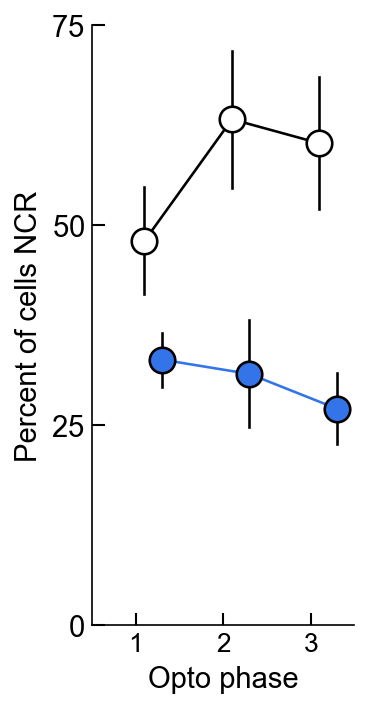

In [34]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

def statsbar(ax,barheight,xpoints,stemheights,text=None,lw=1):
    ymax = ax.get_ylim()[1]
    ymin = ax.get_ylim()[0]
    yrange = ymax-ymin
    ydist = 0.025*yrange
    
    ax.plot([xpoints[0]]*2,[stemheights[0]+ydist,barheight],lw=lw,color='k')
    ax.plot([xpoints[1]]*2,[stemheights[1]+ydist,barheight],lw=lw,color='k')
    ax.plot(xpoints,[barheight]*2,lw=lw,color='k')
    
    if not text is None:
        ax.text(np.mean(xpoints),barheight + ydist,text,horizontalalignment='center',verticalalignment='center')

fig,ax = make_axis_size(1.75, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0#0.1

################################################################################################################

wid = 0.2

offset=0.1
for idx,p in zip(range(6),[1,1,1]):
    
    ax.scatter([idx+wid+p*switch_offset-offset],(mean_pc_NCR_control[idx]),ec='k',fc='white',s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx+wid+p*switch_offset-offset,idx+wid+p*switch_offset-offset],[(mean_pc_NCR_control[idx]-sem_pc_NCR_control[idx]),(mean_pc_NCR_control[idx]+sem_pc_NCR_control[idx])],color='k',lw=1.25,zorder=9)
    
    ax.scatter([idx+wid+p*switch_offset+offset],(mean_pc_NCR[idx]),ec='k',fc=LASER_COLOR,s=150,zorder=10,marker='o',lw=1.25)
    ax.plot([idx+wid+p*switch_offset+offset,idx+wid+p*switch_offset+offset],[(mean_pc_NCR[idx]-sem_pc_NCR[idx]),(mean_pc_NCR[idx]+sem_pc_NCR[idx])],color='k',lw=1.25,zorder=9)
    
ax.plot(np.array(range(3))+wid-offset,[mean_pc_NCR_control[idx] for idx in range(3)],c='k',zorder=-10,lw=1.25)
ax.plot(np.array(range(3))+wid+offset,[mean_pc_NCR[idx] for idx in range(3)],c=LASER_COLOR,zorder=-10,lw=1.25)
    
#ax.scatter([0,1,2,3,4,5],(mean_pc_NCR_passive)/100,fc='white',ec=GOOD_GREY,s=50,zorder=9,marker='o',lw=1)
# statsbar(ax,82,[1-wid-switch_offset,1+wid-switch_offset],stemheights=[passive_mean_pc_NCR[1]+passive_sem_pc_NCR[1] , mean_pc_NCR[1]+sem_pc_NCR[1]],text='*',lw=1)
# statsbar(ax,82,[4-wid+switch_offset,4+wid+switch_offset],stemheights=[passive_mean_pc_NCR[4]+passive_sem_pc_NCR[4] , mean_pc_NCR[4]+sem_pc_NCR[4]],text='****',lw=1)
# statsbar(ax,70,[5-wid+switch_offset,5+wid+switch_offset],stemheights=[passive_mean_pc_NCR[5]+passive_sem_pc_NCR[5] , mean_pc_NCR[5]+sem_pc_NCR[5]],text='****',lw=1)

################################################################################################################

labels = ['1','2','3']

ylab = ax.set_ylabel('Percent of cells NCR')
ax.set_ylim([0,75])
ax.set_yticks([0,25,50,75])
              
ax.set_xlim([-0.5-switch_offset,2.5+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset])
ax.set_xticklabels(labels)
ax.set_xlabel('Opto phase')

# xtick_pos_pre = ax.get_xticks()[1]
# xtick_pos_post = ax.get_xticks()[4]
# Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac)
# t1 = ax.text(xtick_pos_pre, Yval, 'Pre', ha='center', va='bottom', fontsize=stdfont,color='k')
# t2 = ax.text(xtick_pos_post, Yval, 'Post', ha='center', va='bottom',  fontsize=stdfont,color='k')
# ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
# ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

# ax.scatter([], [], ec=PASSIVE_COLOR,fc='white', s=50,lw=1,marker='o',label='passive')
# ax.scatter([], [], ec=PASSIVE_COLOR,fc=PASSIVE_COLOR, s=50,lw=1,marker='o',label='behaving')
# ax.legend(frameon=False,loc=(0.5,0.1),fontsize=14)

### Log
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

### Linear
# Y = np.mean(ax.get_ylim())
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y-np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y+np.ptp(ax.get_ylim())*0.125],lw=1,color=SWITCH_COLOR)

artists = [ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','AC Opto percent NCR V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')